# KNN

| Situation                                                                 | Why KNN Works Well                                                                          |
| ------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| 🧮 **You have labeled data and want to classify** new data points         | KNN is a **supervised learning** algorithm used for **classification** (and regression too) |
| 🗺️ **You want a simple, intuitive model**                                | KNN is easy to understand: it just looks at the “closest neighbors”                         |
| 🔍 **You expect similar examples to be near each other** in feature space | KNN relies on the idea that **similar inputs have similar outputs**                         |
| 🧪 **You don’t need to train a model up front**                           | KNN is a **lazy learner** — no training phase, all the work happens at prediction time      |
| 🌱 **Your dataset is small to medium-sized**                              | KNN gets slow as the number of samples grows, but works well for small datasets             |
| ⚖️ **You want a non-parametric model**                                    | KNN makes **no assumptions** about the data distribution (unlike linear models)             |


| Task              | Example                                                                |
| ----------------- | ---------------------------------------------------------------------- |
| Classification    | Handwritten digit recognition (MNIST), customer segmentation           |
| Recommendation    | Suggesting items based on similar users (k-NN collaborative filtering) |
| Anomaly Detection | Detecting data points that are far from neighbors                      |
| Imputation        | Filling missing values based on nearby data points                     |


| Situation                                    | Why It’s a Problem                                                                 |
| -------------------------------------------- | ---------------------------------------------------------------------------------- |
| 🧱 **Large datasets**                        | KNN does no training; it **searches all data at prediction time**, which is slow   |
| 🌪 **High-dimensional data** (many features) | KNN suffers from the **curse of dimensionality** — distance becomes meaningless    |
| 🧼 **Data not properly scaled**              | KNN relies on distance — features must be on similar scales (use `StandardScaler`) |
| 🔥 **Noisy or irrelevant features**          | KNN can be easily misled by bad or unnecessary features                            |
| 🪙 **Class imbalance**                       | If one class dominates, it can bias the majority vote                              |


| Use KNN When...                           | Avoid KNN When...                          |
| ----------------------------------------- | ------------------------------------------ |
| You want a simple, explainable classifier | You need fast predictions on large data    |
| You have low-dimensional, clean data      | You have many irrelevant or noisy features |
| You don’t want to assume linear patterns  | You haven't scaled your data               |


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.decomposition import PCA


In [12]:
# Step 1: Load dataset
from sklearn.datasets import load_breast_cancer

In [13]:
# Load iris dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [14]:
# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Step 3: Train KNN model
model = KNeighborsClassifier(n_neighbors=5)  # Try different values for k
model.fit(X_train, y_train)


KNeighborsClassifier()

In [16]:
# Step 4: Predict and evaluate
y_pred = model.predict(X_test)

In [17]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9590643274853801

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.90      0.94        63
      benign       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Confusion Matrix:
 [[ 57   6]
 [  1 107]]


In [22]:
# Visualize neighbors in 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

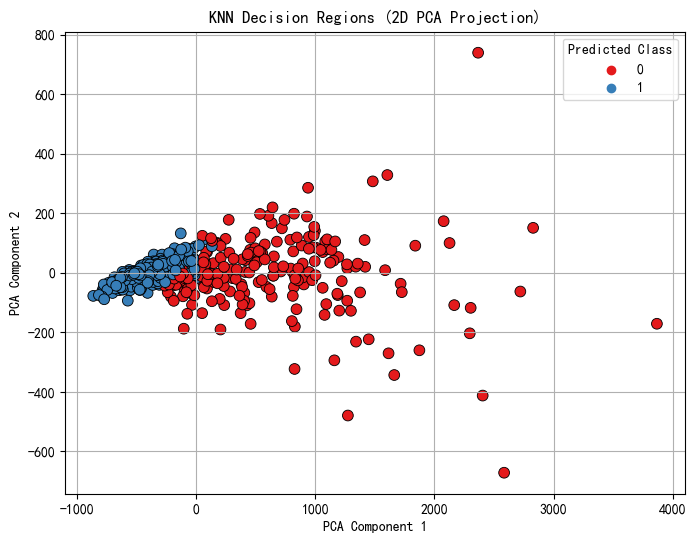

In [23]:
# Refit KNN on full data for visualization
model.fit(X_reduced, y)
y_pred_vis = model.predict(X_reduced)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_pred_vis,
                palette='Set1', edgecolor='k', s=60)
plt.title("KNN Decision Regions (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Predicted Class")
plt.grid(True)
plt.show()

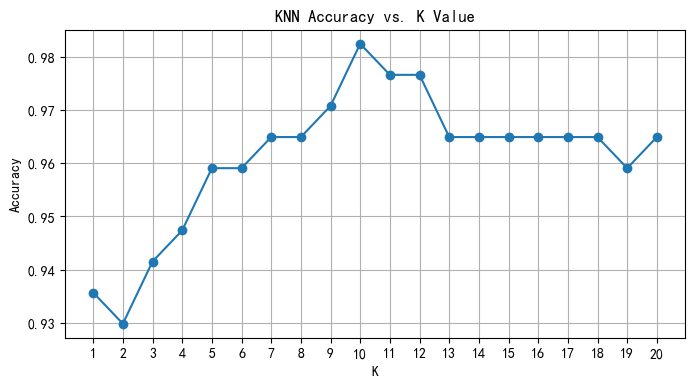

In [18]:
# Step 5: Visualize accuracy vs k
accuracies = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracies.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

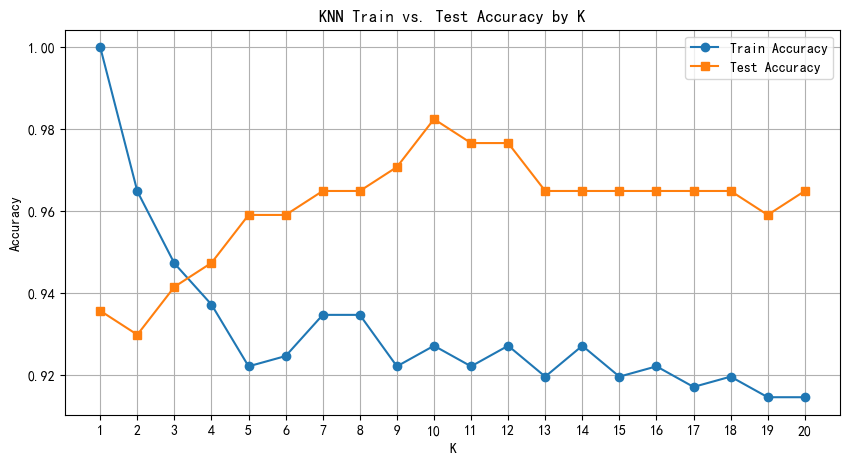

In [24]:
train_accuracies = []
test_accuracies = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_accuracies.append(train_score)
    test_accuracies.append(test_score)

plt.figure(figsize=(10, 5))
plt.plot(k_range, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_range, test_accuracies, marker='s', label='Test Accuracy')
plt.title("KNN Train vs. Test Accuracy by K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()


- At K = 1, train accuracy is 100%, but test accuracy is lower → overfitting
- From K = 6 to 10, test accuracy is very high and stable (peaks around K = 10)
- Train accuracy drops steadily, but not too low → good generalization

- Choose K = 9 or 10
- High test accuracy (~0.98+)
- Acceptable generalization (train accuracy ~0.92)
- Stable region in the curve (not sensitive to small changes)
